### **INIT**

In [ ]:
%%capture
!pip install q tensorflow==2.1
!pip install q keras==2.3.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import random
import itertools
saved_output = []

def plot_gallery(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[r]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

def plot_gallery_norand(images, titles, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
#         r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(char_list_nameonly[titles[i]], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

def plot_gallery_predict(images, predict, true, n_row=3, n_col=4):
    plt.figure(1, figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        r = random.randint(1,len(images))
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[r], cmap=plt.cm.gray)
        plt.title('p:' + str(predict[r]) + '   t:' + str(true[r]), size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()
    #plt.savefig("predict.png")

In [ ]:
loc_collection = '/content/drive/My Drive/Notebook/Auto_Collection_Gray/'
shape = 'Square'
# shape = 'No_Margin'
char_list_nameonly = [
    'Alif‬', 'Bā’', 'Tā’', 'Ṡā’‬', 'Jīm', 'Ḥā’‬', 'Khā’‬',
    'Dāl‬', 'Żāl‬', 'Rā’‬', 'zai‬', 'sīn‬', 'syīn‬', 'ṣād',
    'ḍād', 'ṭā’‬', 'ẓȧ’‬', '‘ain', 'gain‬', 'fā’‬', 'qāf‬',
    'kāf‬', 'lām‬', 'mīm‬', 'nūn‬', 'wāw‬', 'hā’‬', 'yā’‬'
]
import pickle
filename = '/content/drive/My Drive/Notebook/sameratio_keepform.pkl'
sameratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_keepform.pkl'
diffratio_keepform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/sameratio_diffform.pkl'
sameratio_diffform = pickle.load(open(filename, 'rb'))
filename = '/content/drive/My Drive/Notebook/diffratio_diffform.pkl'
diffratio_diffform = pickle.load(open(filename, 'rb'))

print(sameratio_keepform.keys())
print(diffratio_keepform.keys())
print(sameratio_diffform.keys())
print(diffratio_diffform.keys())

dict_keys(['sk_32_bh', 'sk_32_bw', 'sk_sibh', 'sk_sibw', 'sk_largest'])
dict_keys(['dk_32', 'dk_sibh', 'dk_sibw', 'dk_libh', 'dk_libw'])
dict_keys(['sd_32', 'sd_smallest', 'sd_largest'])
dict_keys(['dd_32', 'dd_sibh', 'dd_sibw', 'dd_libh', 'dd_libw'])


In [ ]:
data_dk = []
label_dk = []
for i in range(0,28):
    for x in range(len(diffratio_keepform['dk_32'][i])):
        gd = diffratio_keepform['dk_32'][i][x]
        data_dk.append(diffratio_keepform['dk_32'][i][x])
        label_dk.append(i)
data_dk = np.array(data_dk)
label_dk = np.array(label_dk)

data_sk = []
data_sk_temp = []
label_sk = []
for i in range(0,28):
    for x in range(len(sameratio_keepform['sk_32_bh'][i])):
        data_sk_temp.append(sameratio_keepform['sk_32_bh'][i][x])
        label_sk.append(i)
for x in range(len(data_sk_temp)):
    h, w = data_sk_temp[x].shape
    if h and w > 32:
        img = cv2.resize(data_sk_temp[x], (32, 32))
        print(x)
    else:
        img = data_sk_temp[x]
    y = list(img.ravel())
    y = np.array(y)
    data_sk.append(y.reshape(32, 32))
data_sk = np.array(data_sk)
label_sk = np.array(label_sk)

data_sd = []
label_sd = []
for i in range(0,28):
    for x in range(len(sameratio_diffform['sd_largest'][i])):
        data_sd.append(sameratio_diffform['sd_largest'][i][x])
        label_sd.append(i)
data_sd = np.array(data_sd)
label_sd = np.array(label_sd)
data_sd_32 = []
for data in data_sd:
  data_sd_32.append(cv2.resize(data, (32,32)))
data_sd_32 = np.array(data_sd_32)
data_sd = data_sd_32

data_dd = []
label_dd = []
for i in range(0,28):
    for x in range(len(diffratio_diffform['dd_32'][i])):
        data_dd.append(diffratio_diffform['dd_32'][i][x])
        label_dd.append(i)
data_dd = np.array(data_dd)
label_dd = np.array(label_dd)

1311


sameratio_keepform


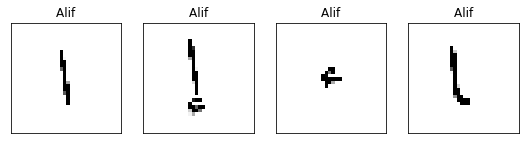

diffratio_keepform


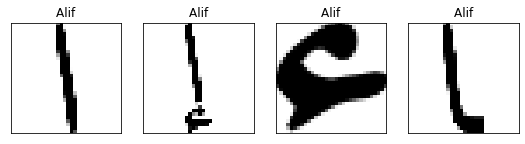

sameratio_diffform


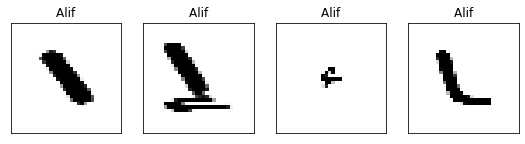

diffratio_diffform


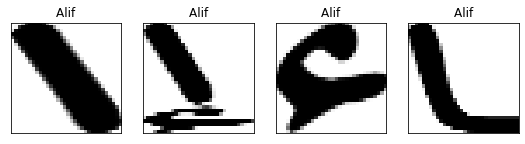

In [42]:
print('sameratio_keepform')
plot_gallery_norand(data_sk, label_sk, 1, 4)
print('diffratio_keepform')
plot_gallery_norand(data_dk, label_dk, 1, 4)
print('sameratio_diffform')
plot_gallery_norand(data_sd, label_sd, 1, 4)
print('diffratio_diffform')
plot_gallery_norand(data_dd, label_dd, 1, 4)

### **Data**

(1452, 32, 32)
(1452,)


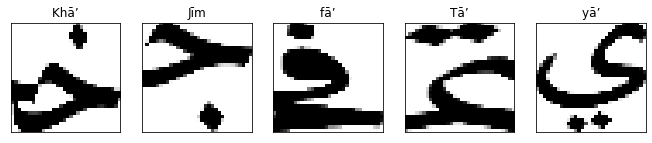

In [43]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42

dtype = 'DD'
data_train, data_test, y_train, y_test = train_test_split(
data_dd, label_dd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [44]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


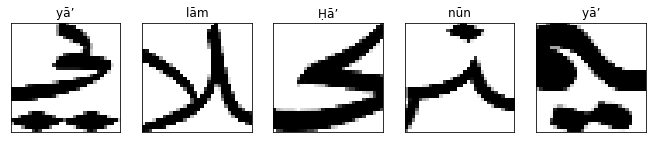

Testing Data 363


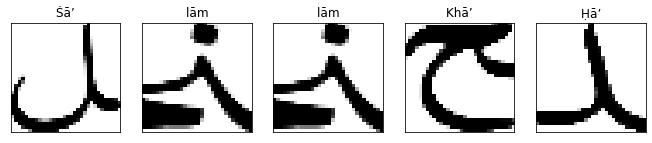

In [45]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [46]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

### **Model**

In [47]:
from sklearn.model_selection import StratifiedKFold
from keras.utils.np_utils import to_categorical
import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import numpy
from time import time
import numpy as np

In [48]:
def densenet(img_shape, n_classes, f=32):
  repetitions = 6, 12, 24, 16
  
  def bn_rl_conv(x, f, k=1, s=1, p='same'):
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(f, k, strides=s, padding=p)(x)
    return x
  
  
  def dense_block(tensor, r):
    for _ in range(r):
      x = bn_rl_conv(tensor, 4*f)
      x = bn_rl_conv(x, f, 3)
      tensor = Concatenate()([tensor, x])
    return tensor
  
  
  def transition_block(x):
    x = bn_rl_conv(x, K.int_shape(x)[-1] // 2)
    x = AvgPool2D(2, strides=2, padding='same')(x)
    return x
  
  
  input = Input(img_shape)
  
  x = Conv2D(64, 7, strides=2, padding='same')(input)
  x = MaxPool2D(3, strides=2, padding='same')(x)
  
  for r in repetitions:
    d = dense_block(x, r)
    x = transition_block(d)
  
  x = GlobalAvgPool2D()(d)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [49]:
%%time
input_shape = 32, 32, 1
n_classes = 28
f=12

K.clear_session()
model = densenet(input_shape, n_classes, f=f)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 8, 8, 64)     256         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [50]:
%%time
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
ep = 50
bs = 32
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('DenseNet')
    filename = '/content/drive/My Drive/Notebook/Training_Files/DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 55s 48ms/step - loss: 2.7128 - accuracy: 0.2334 - val_loss: 3.3067 - val_accuracy: 0.0687
Epoch 2/50
1161/1161 [==============================] - 7s 6ms/step - loss: 1.1597 - accuracy: 0.6830 - val_loss: 3.3867 - val_accuracy: 0.0756
Epoch 3/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.4318 - accuracy: 0.8906 - val_loss: 3.7638 - val_accuracy: 0.0515
Epoch 4/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.1936 - accuracy: 0.9509 - val_loss: 4.6437 - val_accuracy: 0.0412
Epoch 5/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.1377 - accuracy: 0.9621 - val_loss: 4.5402 - val_accuracy: 0.0653
Epoch 6/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.1861 - accuracy: 0.9500 - val_loss: 5.4175 - val_accuracy: 0.0550
Epoch 7/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.19

### **Result**

k =  1


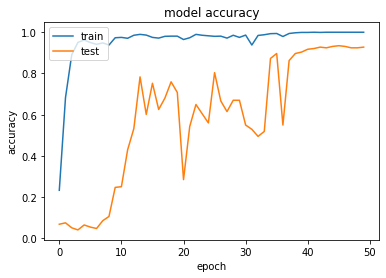

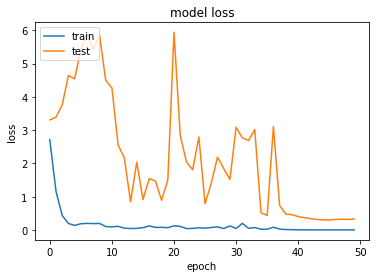

k =  2


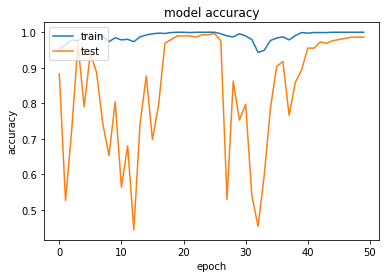

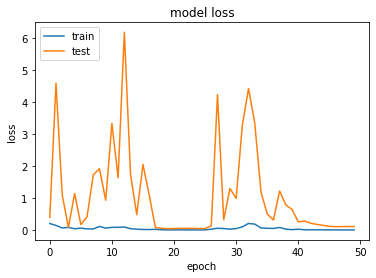

k =  3


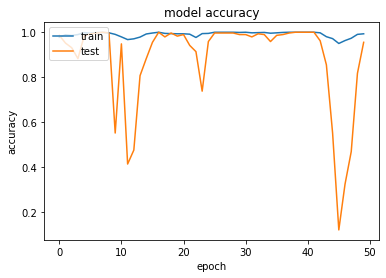

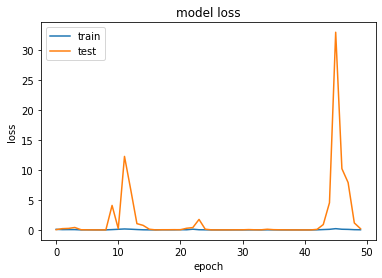

k =  4


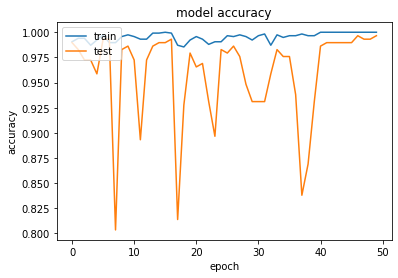

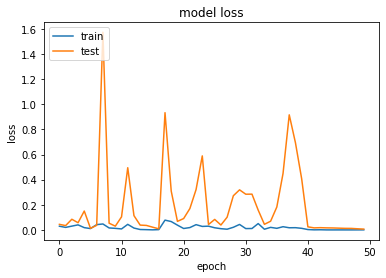

k =  5


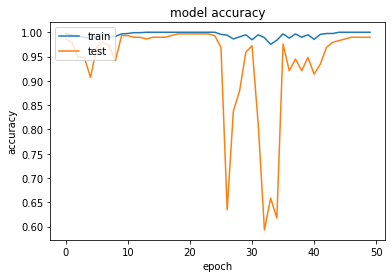

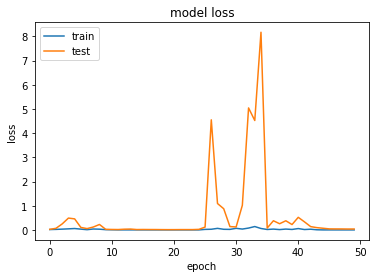

In [51]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        15
           2       0.96      1.00      0.98        25
           3       0.95      1.00      0.97        19
           4       0.96      1.00      0.98        23
           5       1.00      0.88      0.93        24
           6       1.00      0.86      0.92        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        16
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00        11
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         5
          17       0.85    

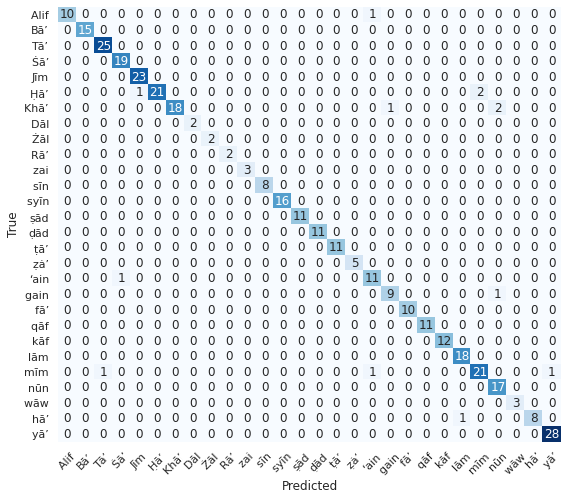

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next DK**

In [53]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


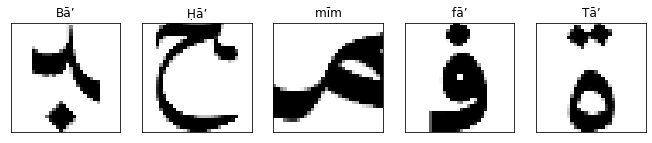

In [54]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'DK'
data_train, data_test, y_train, y_test = train_test_split(
data_dk, label_dk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [55]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


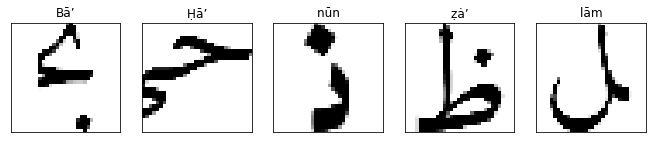

Testing Data 363


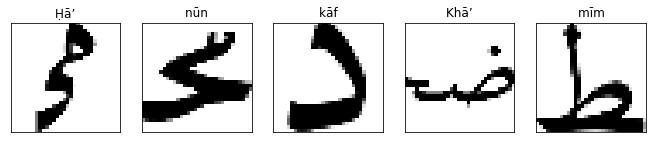

In [56]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [57]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [58]:
%%time
K.clear_session()
model = densenet(input_shape, n_classes, f=f)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('DenseNet')
    filename = '/content/drive/My Drive/Notebook/Training_Files/DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 58s 50ms/step - loss: 2.6369 - accuracy: 0.2438 - val_loss: 3.2912 - val_accuracy: 0.0515
Epoch 2/50
1161/1161 [==============================] - 7s 6ms/step - loss: 1.2351 - accuracy: 0.6486 - val_loss: 3.4071 - val_accuracy: 0.0550
Epoch 3/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.6094 - accuracy: 0.8312 - val_loss: 3.7526 - val_accuracy: 0.0515
Epoch 4/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.3829 - accuracy: 0.8846 - val_loss: 4.2446 - val_accuracy: 0.0584
Epoch 5/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.2745 - accuracy: 0.9182 - val_loss: 5.3482 - val_accuracy: 0.0790
Epoch 6/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.1601 - accuracy: 0.9561 - val_loss: 6.2174 - val_accuracy: 0.0481
Epoch 7/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.10

k =  1


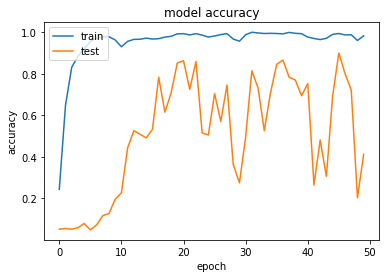

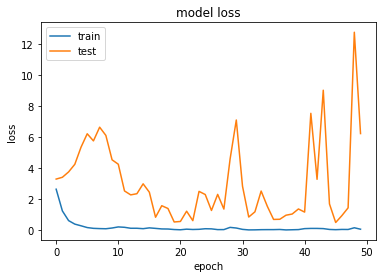

k =  2


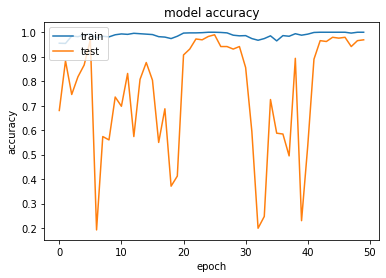

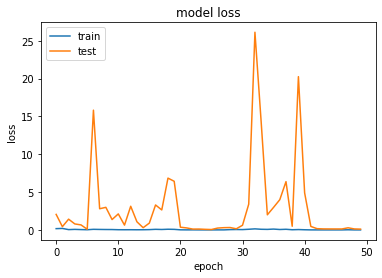

k =  3


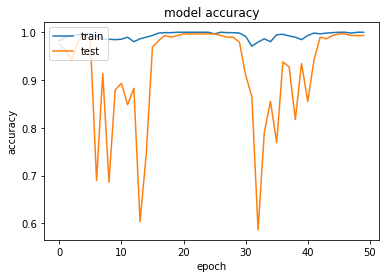

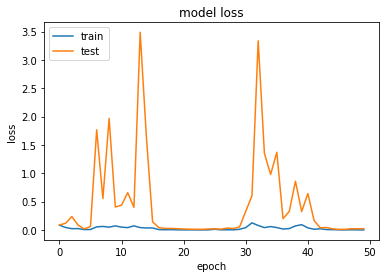

k =  4


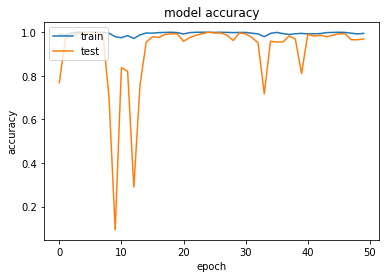

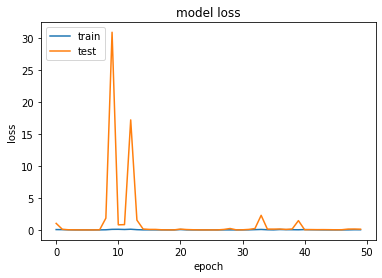

k =  5


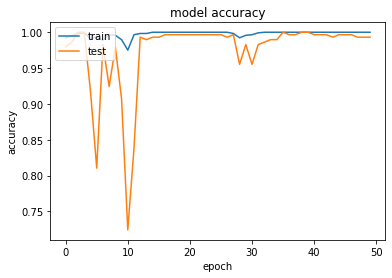

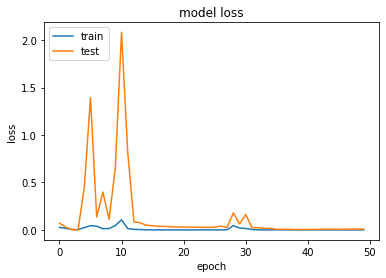

In [59]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       1.00      1.00      1.00        15
           2       1.00      0.96      0.98        25
           3       0.95      0.95      0.95        19
           4       1.00      1.00      1.00        23
           5       0.92      0.96      0.94        24
           6       0.95      0.90      0.93        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.67      1.00      0.80         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        16
          13       0.92      1.00      0.96        11
          14       1.00      0.91      0.95        11
          15       0.92      1.00      0.96        11
          16       1.00      1.00      1.00         5
          17       0.86    

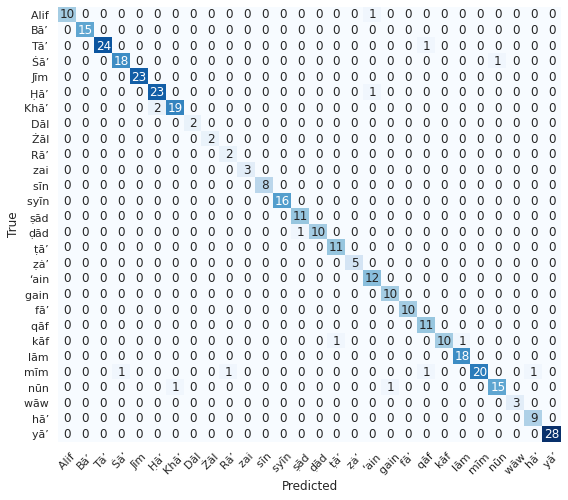

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SD**

In [61]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


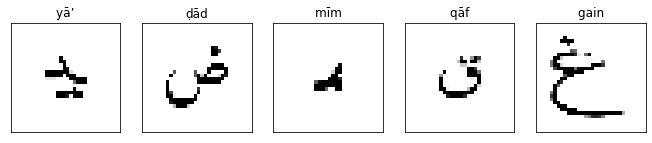

In [62]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SD'
data_train, data_test, y_train, y_test = train_test_split(
data_sd, label_sd, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [63]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


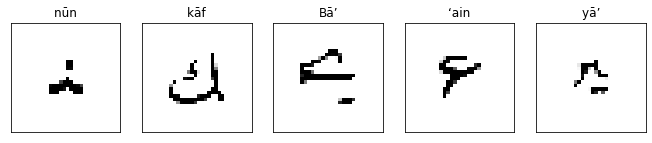

Testing Data 363


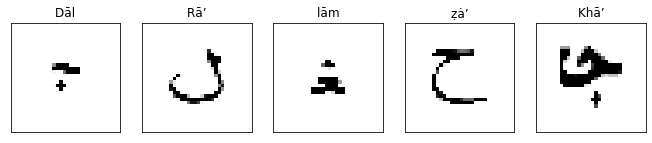

In [64]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [65]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [66]:
%%time
K.clear_session()
model = densenet(input_shape, n_classes, f=f)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('DenseNet')
    filename = '/content/drive/My Drive/Notebook/Training_Files/DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 60s 52ms/step - loss: 2.9746 - accuracy: 0.1344 - val_loss: 3.3281 - val_accuracy: 0.0515
Epoch 2/50
1161/1161 [==============================] - 8s 6ms/step - loss: 1.9411 - accuracy: 0.4091 - val_loss: 3.5427 - val_accuracy: 0.0137
Epoch 3/50
1161/1161 [==============================] - 8s 6ms/step - loss: 1.2290 - accuracy: 0.6047 - val_loss: 3.9543 - val_accuracy: 0.0137
Epoch 4/50
1161/1161 [==============================] - 8s 7ms/step - loss: 0.8746 - accuracy: 0.7166 - val_loss: 4.4698 - val_accuracy: 0.0412
Epoch 5/50
1161/1161 [==============================] - 8s 7ms/step - loss: 0.7058 - accuracy: 0.7769 - val_loss: 5.3711 - val_accuracy: 0.0309
Epoch 6/50
1161/1161 [==============================] - 8s 7ms/step - loss: 0.5260 - accuracy: 0.8346 - val_loss: 6.1623 - val_accuracy: 0.0687
Epoch 7/50
1161/1161 [==============================] - 8s 7ms/step - loss: 0.41

k =  1


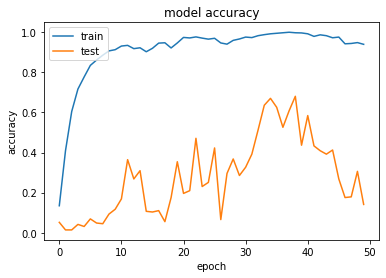

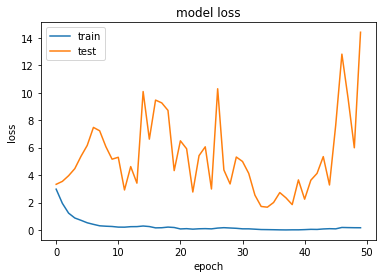

k =  2


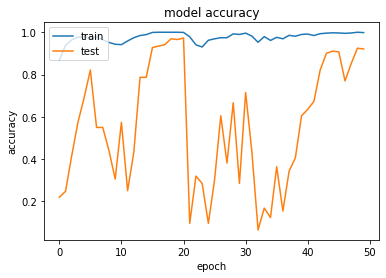

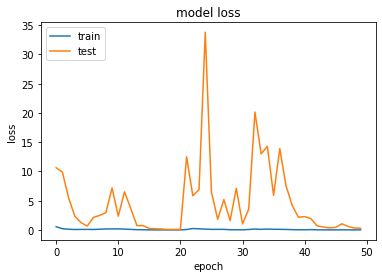

k =  3


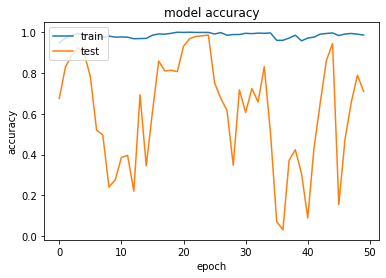

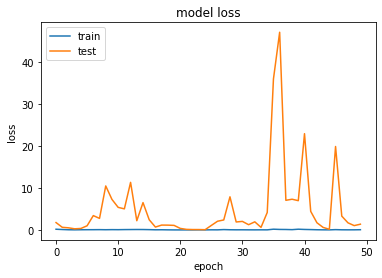

k =  4


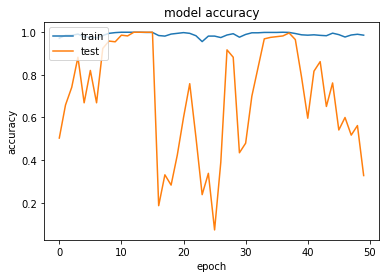

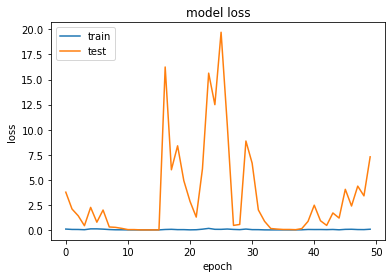

k =  5


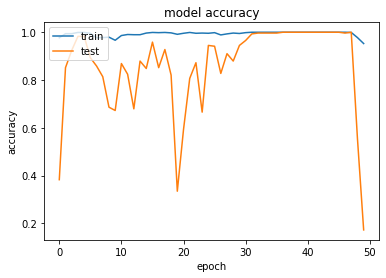

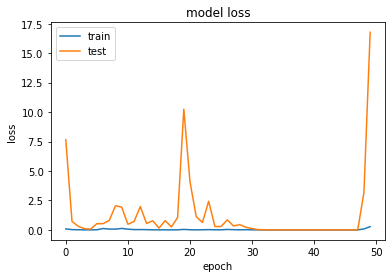

In [67]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.64      0.93      0.76        15
           2       0.78      1.00      0.88        25
           3       0.92      0.63      0.75        19
           4       0.88      0.91      0.89        23
           5       0.68      0.62      0.65        24
           6       0.61      0.81      0.69        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       0.33      0.50      0.40         2
          10       0.75      1.00      0.86         3
          11       1.00      0.88      0.93         8
          12       0.84      1.00      0.91        16
          13       0.85      1.00      0.92        11
          14       1.00      0.82      0.90        11
          15       1.00      1.00      1.00        11
          16       1.00      1.00      1.00         5
          17       0.64    

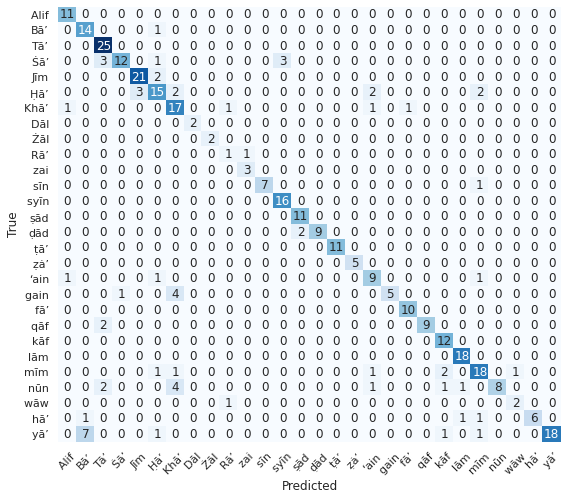

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)

### **Next SK**

In [69]:
%reset_selective -f data_train
%reset_selective -f data_test
%reset_selective -f y_train
%reset_selective -f y_test
%reset_selective -f loaded_train
%reset_selective -f loaded_test
%reset_selective -f model
sns.reset_orig()

(1452, 32, 32)
(1452,)


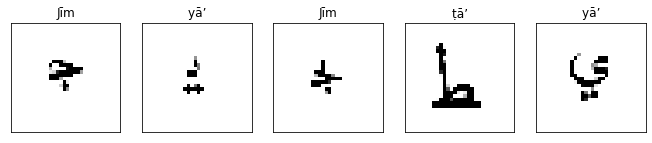

In [70]:
from sklearn.model_selection import train_test_split
test_size = 0.20
random_state = 42
dtype = 'SK'
data_train, data_test, y_train, y_test = train_test_split(
data_sk, label_sk, test_size=test_size,random_state=random_state)
train = {}
train['image'] = data_train
train['label'] = y_train
test = {}
test['image'] = data_test
test['label'] = y_test

filename = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
pickle.dump(train, open(filename, 'wb'))
filename = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'
pickle.dump(test, open(filename, 'wb'))
print(data_train.shape)
print(y_train.shape)
plot_gallery(data_train, y_train, 1,5)

In [71]:
filename_train = '/content/drive/My Drive/Notebook/Training_Files/train_dataset.pkl'
filename_test = '/content/drive/My Drive/Notebook/Training_Files/test_dataset.pkl'

loaded_train = pickle.load(open(filename_train, 'rb'))
loaded_test = pickle.load(open(filename_test, 'rb'))

Training Data 1452


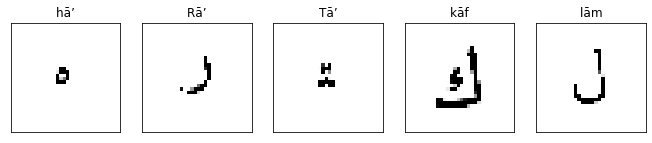

Testing Data 363


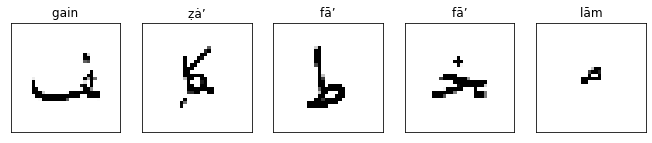

In [72]:
print('Training Data', len(loaded_train['image']))
plot_gallery(loaded_train['image'], loaded_train['label'], 1, 5)
print('Testing Data', len(loaded_test['image']))
plot_gallery(loaded_test['image'], loaded_train['label'], 1, 5)

In [73]:
data_train = loaded_train['image']
data_train = data_train.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_train = loaded_train['label']

data_test = loaded_test['image']
data_test = data_test.reshape(-1, 32, 32, 1).astype(np.float32)/255
y_test = loaded_test['label']

In [74]:
%%time
K.clear_session()
model = densenet(input_shape, n_classes, f=f)
# earlystopper = EarlyStopping(monitor='val_loss',
#                              patience=10, verbose=1, mode='auto')
seed = 7
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
X = data_train
Y = y_train
cvscores = []
history = []
lim = 0
count = 0
for train, test in kfold.split(X, Y):
    y_cat = to_categorical(Y).astype(int)
    print('k = ', count)
    count += 1
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    h = model.fit(X[train] ,y_cat[train], epochs = ep,
                    batch_size = bs, 
                    validation_data = [X[test], y_cat[test]],
                    )
                      # callbacks = [earlystopper])
#                     callbacks=[checkpointer, earlystopper, tensorboard])

    history.append(h)
    # evaluate the model
    scores = model.evaluate(X[test], y_cat[test], verbose=1)
    if scores[1]>lim:
        lim = scores[1]
        filename = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
        pickle.dump(model, open(filename, 'wb'))
        model.save('DenseNet')
    filename = '/content/drive/My Drive/Notebook/Training_Files/DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'_k'+str(count)+'.pkl'
    pickle.dump(model, open(filename, 'wb'))
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

k =  0
Train on 1161 samples, validate on 291 samples
Epoch 1/50
1161/1161 [==============================] - 61s 52ms/step - loss: 2.9684 - accuracy: 0.1705 - val_loss: 3.3018 - val_accuracy: 0.0687
Epoch 2/50
1161/1161 [==============================] - 8s 6ms/step - loss: 2.0282 - accuracy: 0.3936 - val_loss: 3.4262 - val_accuracy: 0.0515
Epoch 3/50
1161/1161 [==============================] - 7s 6ms/step - loss: 1.3595 - accuracy: 0.5504 - val_loss: 3.8731 - val_accuracy: 0.0515
Epoch 4/50
1161/1161 [==============================] - 7s 6ms/step - loss: 1.0666 - accuracy: 0.6546 - val_loss: 4.3515 - val_accuracy: 0.0515
Epoch 5/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.7998 - accuracy: 0.7442 - val_loss: 5.2459 - val_accuracy: 0.0515
Epoch 6/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.6608 - accuracy: 0.7795 - val_loss: 7.8957 - val_accuracy: 0.0515
Epoch 7/50
1161/1161 [==============================] - 7s 6ms/step - loss: 0.45

k =  1


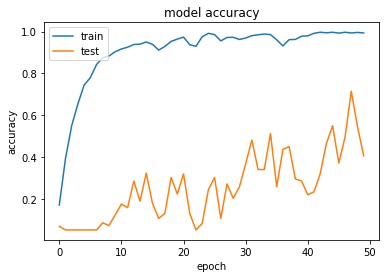

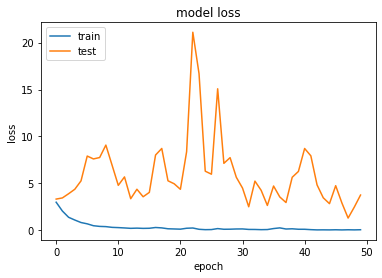

k =  2


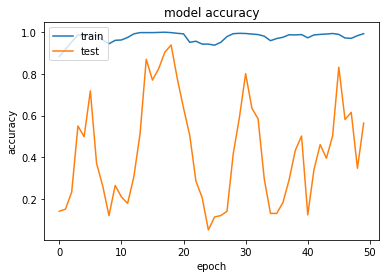

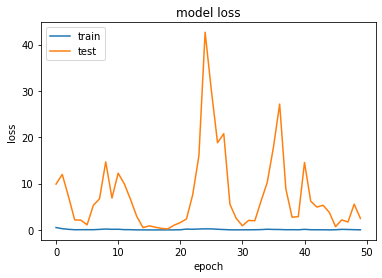

k =  3


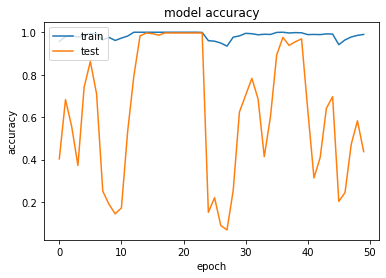

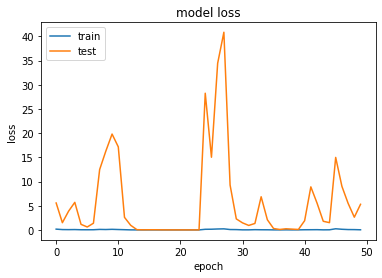

k =  4


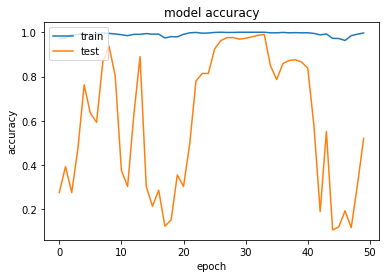

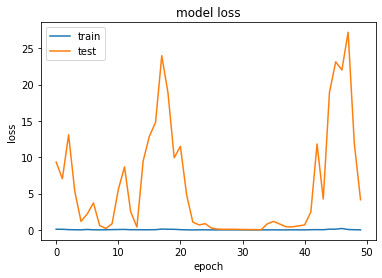

k =  5


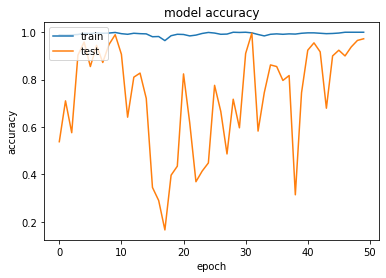

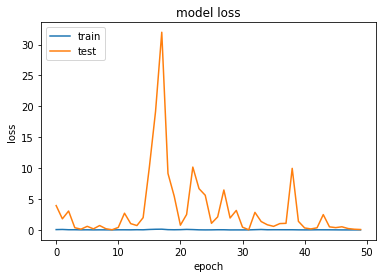

In [75]:
# summarize history for accuracy
filename = '/content/drive/My Drive/Notebook/Training_Files/history_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
pickle.dump(history, open(filename, 'wb'))
c = 1
for h in history:
    print('k = ', c)
    c += 1
    plt.plot(h.history['accuracy'])
    plt.plot(h.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(h.history['loss'])
    plt.plot(h.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.75      1.00      0.86        15
           2       0.86      0.96      0.91        25
           3       0.94      0.79      0.86        19
           4       0.87      0.87      0.87        23
           5       0.94      0.62      0.75        24
           6       0.79      0.90      0.84        21
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       0.78      0.88      0.82         8
          12       0.88      0.94      0.91        16
          13       0.92      1.00      0.96        11
          14       0.77      0.91      0.83        11
          15       1.00      0.64      0.78        11
          16       1.00      1.00      1.00         5
          17       0.71    

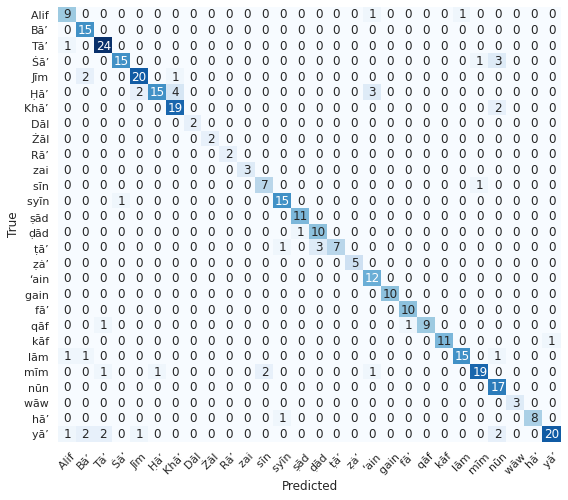

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model_name = '/content/drive/My Drive/Notebook/Training_Files/best_model_DenseNet_'+str(dtype)+'_f'+str(f)+'_'+str(ep)+'_'+str(bs)+'.pkl'
model = pickle.load(open(model_name, 'rb'))
y_pred = model.predict(data_test)
y_pred = np.argmax(y_pred, axis = 1)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(9,8)})
heatmap = sns.heatmap(cm, annot=True, cmap='Blues',
            xticklabels=char_list_nameonly, yticklabels=char_list_nameonly, cbar=False)
heatmap.set(ylabel='True', xlabel='Predicted')
plot_cm = heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)